# 2-D Heat Equation

The heat equation describes the diffusion of heat over time and space. In this section, we describe the example project that we will use throughout the tutorial. The project is a simple Python application that solves the 2-dimensional heat equation using the finite difference method.

In two dimensions, the heat equation is:

$$\frac{\partial u}{\partial t} = \kappa \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)$$

where:
 -  $u(x,y,t)$ is the temperature at position $(x,y)$ and time $t$,
 - $\kappa$ is the thermal diffusivity of the material.

## Discretization:

To solve this equation numerically, we discretize both time and space. We divide the spatial domain into $N_x$ and $N_y$ equally spaced points with spacing $\Delta x$ and $\Delta y$, respectively, and we advance the solution in time with time steps of size $\Delta t$.

We'll use the **central difference** approximation for the second spatial derivative:

$$\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta x^2}$$

$$\frac{\partial^2 u}{\partial y^2} \approx \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\Delta y^2}$$

This leads to an explicit update rule for each grid point:

$$u_{i,j}^{n+1} = u_{i,j}^n + \frac{\kappa \Delta t}{\Delta x^2} (u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n) + \frac{\kappa \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)$$


## Python Implementation

Now, let's write a simple Python implementation of the finite difference method to solve the 2-dimensional heat equation. The implementation will include functions for initializing the grid, updating the temperature values, and running the simulation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dx = 1.0  # Spatial step size
dy = 1.0  # Spatial step size
dt = 0.25  # Time step size
kappa = 1.0  # Thermal diffusivity

In [3]:
def apply_gaussian_bump(q, center, width):
    """Apply a Gaussian bump as initial condition."""
    ny, nx = q.shape
    y, x = np.meshgrid(np.arange(ny), np.arange(nx), indexing='ij')
    cy, cx = center
    bump = np.exp(-(((x - cx)**2 + (y - cy)**2) / (2 * width**2)))
    q += bump

def dirichlet_boundary_conditions(q, value=0.0):
    """Apply Dirichlet boundary conditions (fixed value at edges)."""
    q[0, :] = value
    q[-1, :] = value
    q[:, 0] = value
    q[:, -1] = value
    return q

def advance(q, dx, dy, dt, kappa):
    """Advance the 2D heat equation for one time step."""
    d2q_dx2 = (q[2:, 1:-1] - 2 * q[1:-1, 1:-1] + q[:-2, 1:-1]) / dx**2
    d2q_dy2 = (q[1:-1, 2:] - 2 * q[1:-1, 1:-1] + q[1:-1, :-2]) / dy**2
    q[1:-1, 1:-1] += dt * kappa * (d2q_dx2 + d2q_dy2)


In [4]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def plot_2d_array(q):
    """Plot a 2D array using matplotlib."""
    plt.imshow(q, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('2D Heat Distribution')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

def animate_history(hist):
    """Animate the history of the temperature distribution."""
    fig, ax = plt.subplots()
    im = ax.imshow(hist[0], cmap='hot', interpolation='nearest')
    plt.colorbar(im, ax=ax)

    def update(frame):
        im.set_array(hist[frame])
        return [im]

    ani = FuncAnimation(fig, update, frames=len(hist), blit=True)
    plt.close(fig)  # Prevents duplicate static plot display
    return HTML(ani.to_jshtml())

In [5]:
# Runtime parameters
nx, ny = 100, 100
dx = dy = 1.0
dt = 0.25
kappa = 1.0
steps = 1000

In [6]:
# Initial Conditions
q = np.zeros((ny, nx))
apply_gaussian_bump(q, center=(50, 50), width=10.0)

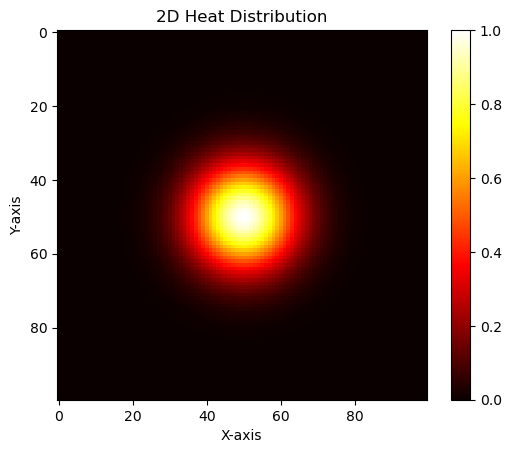

In [8]:
plot_2d_array(q)

In [9]:
history = []
for t in range(steps):
    q = dirichlet_boundary_conditions(q)
    advance(q, dx, dy, dt, kappa)
    if t % 100 == 0:  # Store every 10th step
        history.append(q.copy())

In [10]:
%matplotlib inline
animate_history(history)